# Proyek Machine Learning : Predictive Analytics

* Domain : Ekonomi dan Pendidikan
* Tujuan : Melakukan Prediksi pendapatan(**salary**) Lulusan Jurusan Teknik di India
* Dataset yang digunakan : https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction

## Melakukan Import terhadap Library yang diperlukan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from pandas import read_csv

## DATA UNDERSTANDING

### Memuat Dataset ***Engineering_graduate_salary.csv*** pada variabel **"df"**

In [2]:
df = read_csv('drive/MyDrive/csv/Engineering_graduate_salary.csv')

### Menampilkan tipe data setiap kolom pada dataset "df"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

### Menghapus(**drop**) kolom/fitur yang tidak diperlukan

In [ ]:
df.drop(
    ['ID', 'DOB', '10board', '12board', 'CollegeID', 'CollegeTier', 
     '10percentage','12graduation', '12percentage', 'CollegeCityID', 
     'CollegeCityTier','Degree','GraduationYear'], 
    axis='columns', 
    inplace=True
)

### Menampilkan tipe data setiap kolom pada dataset "df" setelah proses ***drop***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   Specialization         2998 non-null   object 
 2   collegeGPA             2998 non-null   float64
 3   CollegeState           2998 non-null   object 
 4   English                2998 non-null   int64  
 5   Logical                2998 non-null   int64  
 6   Quant                  2998 non-null   int64  
 7   Domain                 2998 non-null   float64
 8   ComputerProgramming    2998 non-null   int64  
 9   ElectronicsAndSemicon  2998 non-null   int64  
 10  ComputerScience        2998 non-null   int64  
 11  MechanicalEngg         2998 non-null   int64  
 12  ElectricalEngg         2998 non-null   int64  
 13  TelecomEngg            2998 non-null   int64  
 14  CivilEngg              2998 non-null   int64  
 15  cons

###  Deskripsi Variabel Numerik

In [ ]:
df.describe()

collegeGPA      English  ...  openess_to_experience        Salary
count  2998.000000  2998.000000  ...            2998.000000  2.998000e+03
mean     71.509857   501.066378  ...              -0.141111  3.051748e+05
std       8.122462   105.304512  ...               1.007134  2.123312e+05
min       6.630000   180.000000  ...              -7.375700  3.500000e+04
25%      66.530000   425.000000  ...              -0.669200  1.800000e+05
50%      71.800000   500.000000  ...              -0.094300  3.000000e+05
75%      76.300000   570.000000  ...               0.502400  3.700000e+05
max      99.930000   875.000000  ...               1.630200  4.000000e+06

[8 rows x 18 columns]

### Mendapatkan ukuran(***shape***) dari dataset

In [ ]:
df.shape

(2998, 21)

### Melakukan pemeriksaan terhadap nilai yang hilang(***missing value***) pada dataset

In [ ]:
df.isnull().sum()

Gender                   0
Specialization           0
collegeGPA               0
CollegeState             0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

### Memvisualisasikan data menggunakan ***boxplot*** untuk fitur numerik:
<ul>
  <li>[collegeGPA]</li>
  <li>[English]</li>
  <li>[Logical]</li>
  <li>[Quant]</li>
  <li>[Domain]</li>
  <li>[ComputerProgramming]</li>
  <li>[ElectronicsAndSemicon]</li>
</ul>

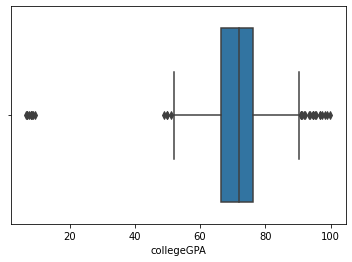

In [ ]:
sns.boxplot(x=df['collegeGPA'])

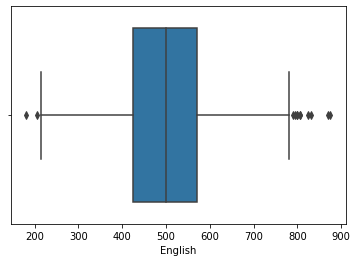

In [ ]:
sns.boxplot(x=df['English'])

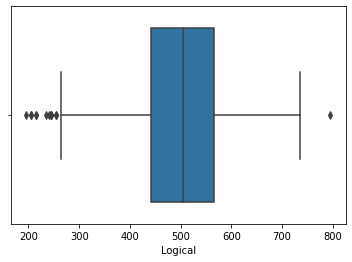

In [ ]:
sns.boxplot(x=df['Logical'])

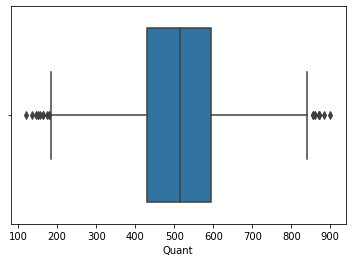

In [ ]:
sns.boxplot(x=df['Quant'])

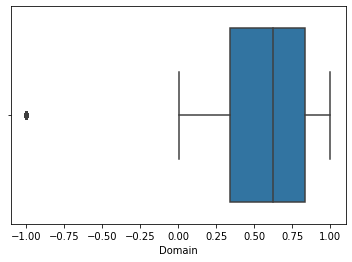

In [ ]:
sns.boxplot(x=df['Domain'])

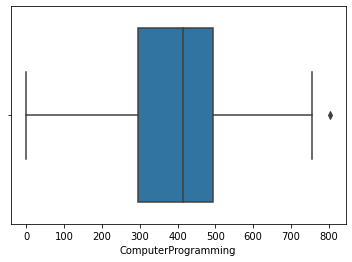

In [ ]:
sns.boxplot(x=df['ComputerProgramming'])

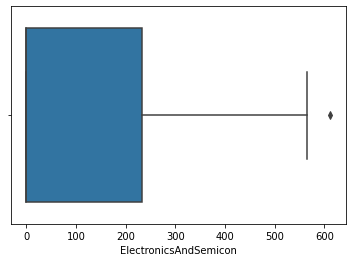

In [ ]:
sns.boxplot(x=df['ElectronicsAndSemicon'])

### Mengatasi masalah ***outlier*** dengan Metode IQR

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

### Menampilkan ukuran dataset setelah ***outliers*** diatasi

In [ ]:
df.shape

(1433, 21)

### Menampilkan tipe data setiap kolom pada dataset "df" setelah proses ***outliers*** diatasi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2996
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 1433 non-null   object 
 1   Specialization         1433 non-null   object 
 2   collegeGPA             1433 non-null   float64
 3   CollegeState           1433 non-null   object 
 4   English                1433 non-null   int64  
 5   Logical                1433 non-null   int64  
 6   Quant                  1433 non-null   int64  
 7   Domain                 1433 non-null   float64
 8   ComputerProgramming    1433 non-null   int64  
 9   ElectronicsAndSemicon  1433 non-null   int64  
 10  ComputerScience        1433 non-null   int64  
 11  MechanicalEngg         1433 non-null   int64  
 12  ElectricalEngg         1433 non-null   int64  
 13  TelecomEngg            1433 non-null   int64  
 14  CivilEngg              1433 non-null   int64  
 15  cons

### Menganalisa data menggunakan Univariate Analysis

#### Membagi fitur numerik dan kategorik yang terdapat pada dataset ####

In [ ]:
numeric_feature = ['collegeGPA', 'English', 'Logical', 'Quant',  'Domain',
                 'ComputerProgramming',   'ElectronicsAndSemicon',  'ComputerScience',
                 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
                 'openess_to_experience', 'Salary']
category_feature = ['Gender', 'Specialization', 'CollegeState']

#### Menganalisa fitur kategori ###

   Jumlah sampel  persentase
m           1035        72.2
f            398        27.8


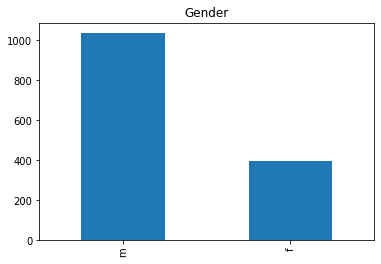

In [ ]:
feature = category_feature[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dataFrame = pd.DataFrame({'Jumlah sampel':count, 'persentase':percent.round(1)})
print(dataFrame)
count.plot(kind='bar', title=feature)

#### Menganalisa fitur specialization

                                             Jumlah sampel  persentase
computer engineering                                   333        23.2
electronics and communication engineering              319        22.3
information technology                                 307        21.4
computer science & engineering                         153        10.7
computer application                                   131         9.1
electronics and electrical engineering                  54         3.8
electronics & telecommunications                        44         3.1
electrical engineering                                  19         1.3
electronics & instrumentation eng                       13         0.9
electronics and instrumentation engineering             12         0.8
instrumentation and control engineering                 11         0.8
information science engineering                          7         0.5
electronics engineering                                  6         0.4
biotec

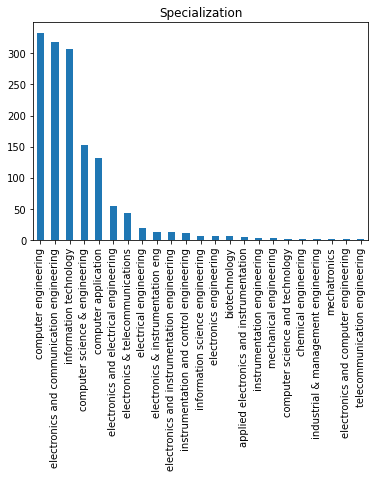

In [ ]:
feature = category_feature[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dataFrame = pd.DataFrame({'Jumlah sampel':count, 'persentase':percent.round(1)})
print(dataFrame)
count.plot(kind='bar', title=feature)

#### Menganalisa fitur CollegeState

                   Jumlah sampel  persentase
Uttar Pradesh                366        25.5
Karnataka                    140         9.8
Tamil Nadu                   122         8.5
Telangana                    109         7.6
Maharashtra                   93         6.5
Andhra Pradesh                79         5.5
Madhya Pradesh                67         4.7
Haryana                       66         4.6
Rajasthan                     65         4.5
Delhi                         64         4.5
Orissa                        63         4.4
West Bengal                   57         4.0
Punjab                        53         3.7
Uttarakhand                   39         2.7
Kerala                        12         0.8
Chhattisgarh                   8         0.6
Gujarat                        8         0.6
Jharkhand                      5         0.3
Jammu and Kashmir              5         0.3
Bihar                          4         0.3
Union Territory                4         0.3
Himachal P

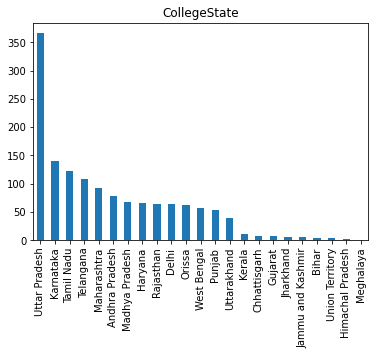

In [ ]:
feature = category_feature[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dataFrame = pd.DataFrame({'Jumlah sampel':count, 'persentase':percent.round(1)})
print(dataFrame)
count.plot(kind='bar', title=feature)

### Menganalisa data menggunakan Multivariate Analysis

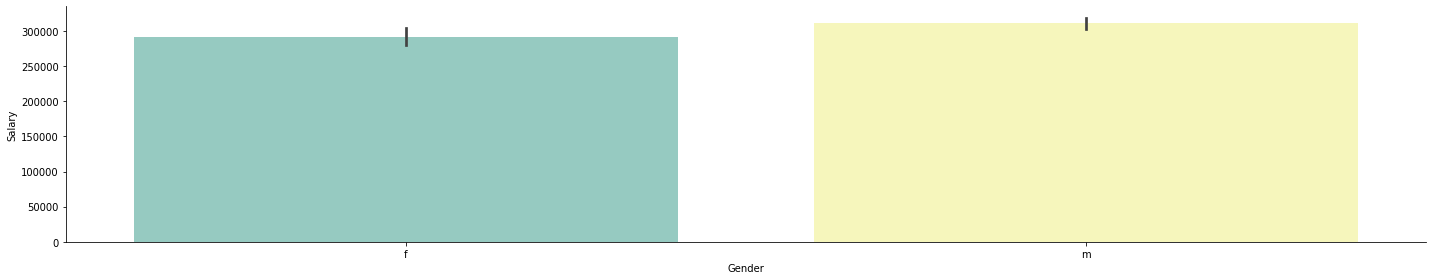

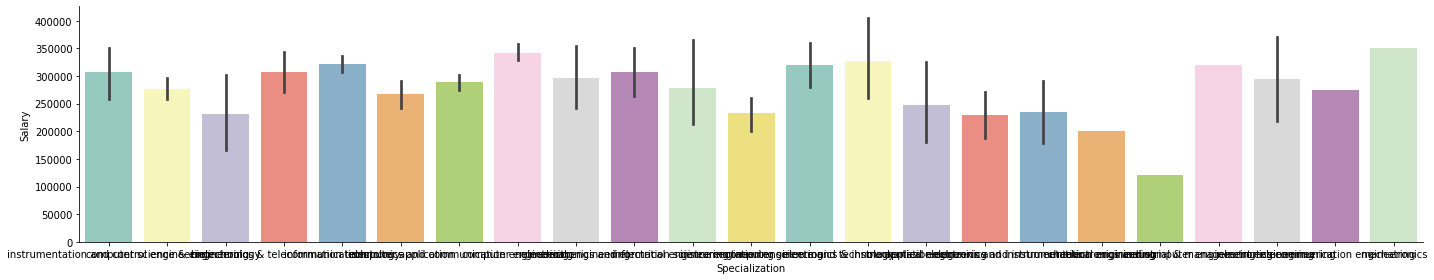

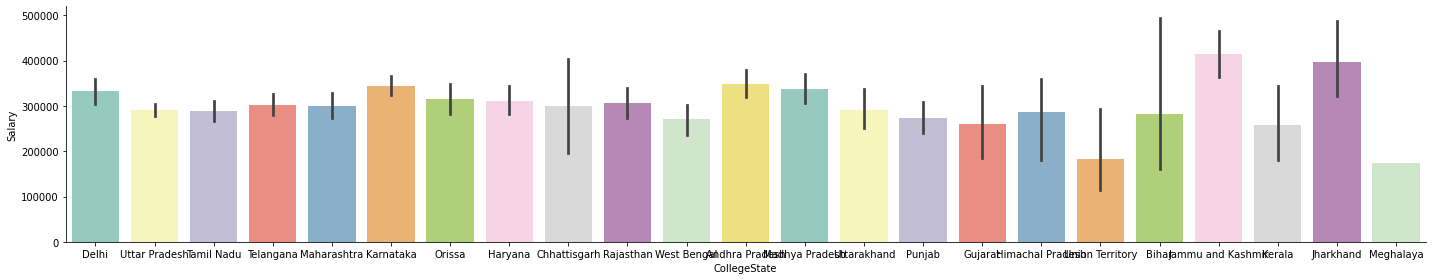

In [ ]:
# fitur kategori dan numerik
category = df.select_dtypes(include='object').columns.to_list()

for col in category:
  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4,
              aspect = 5, data=df, palette="Set3")

### Menampilkan Plot Pair fitur numerik

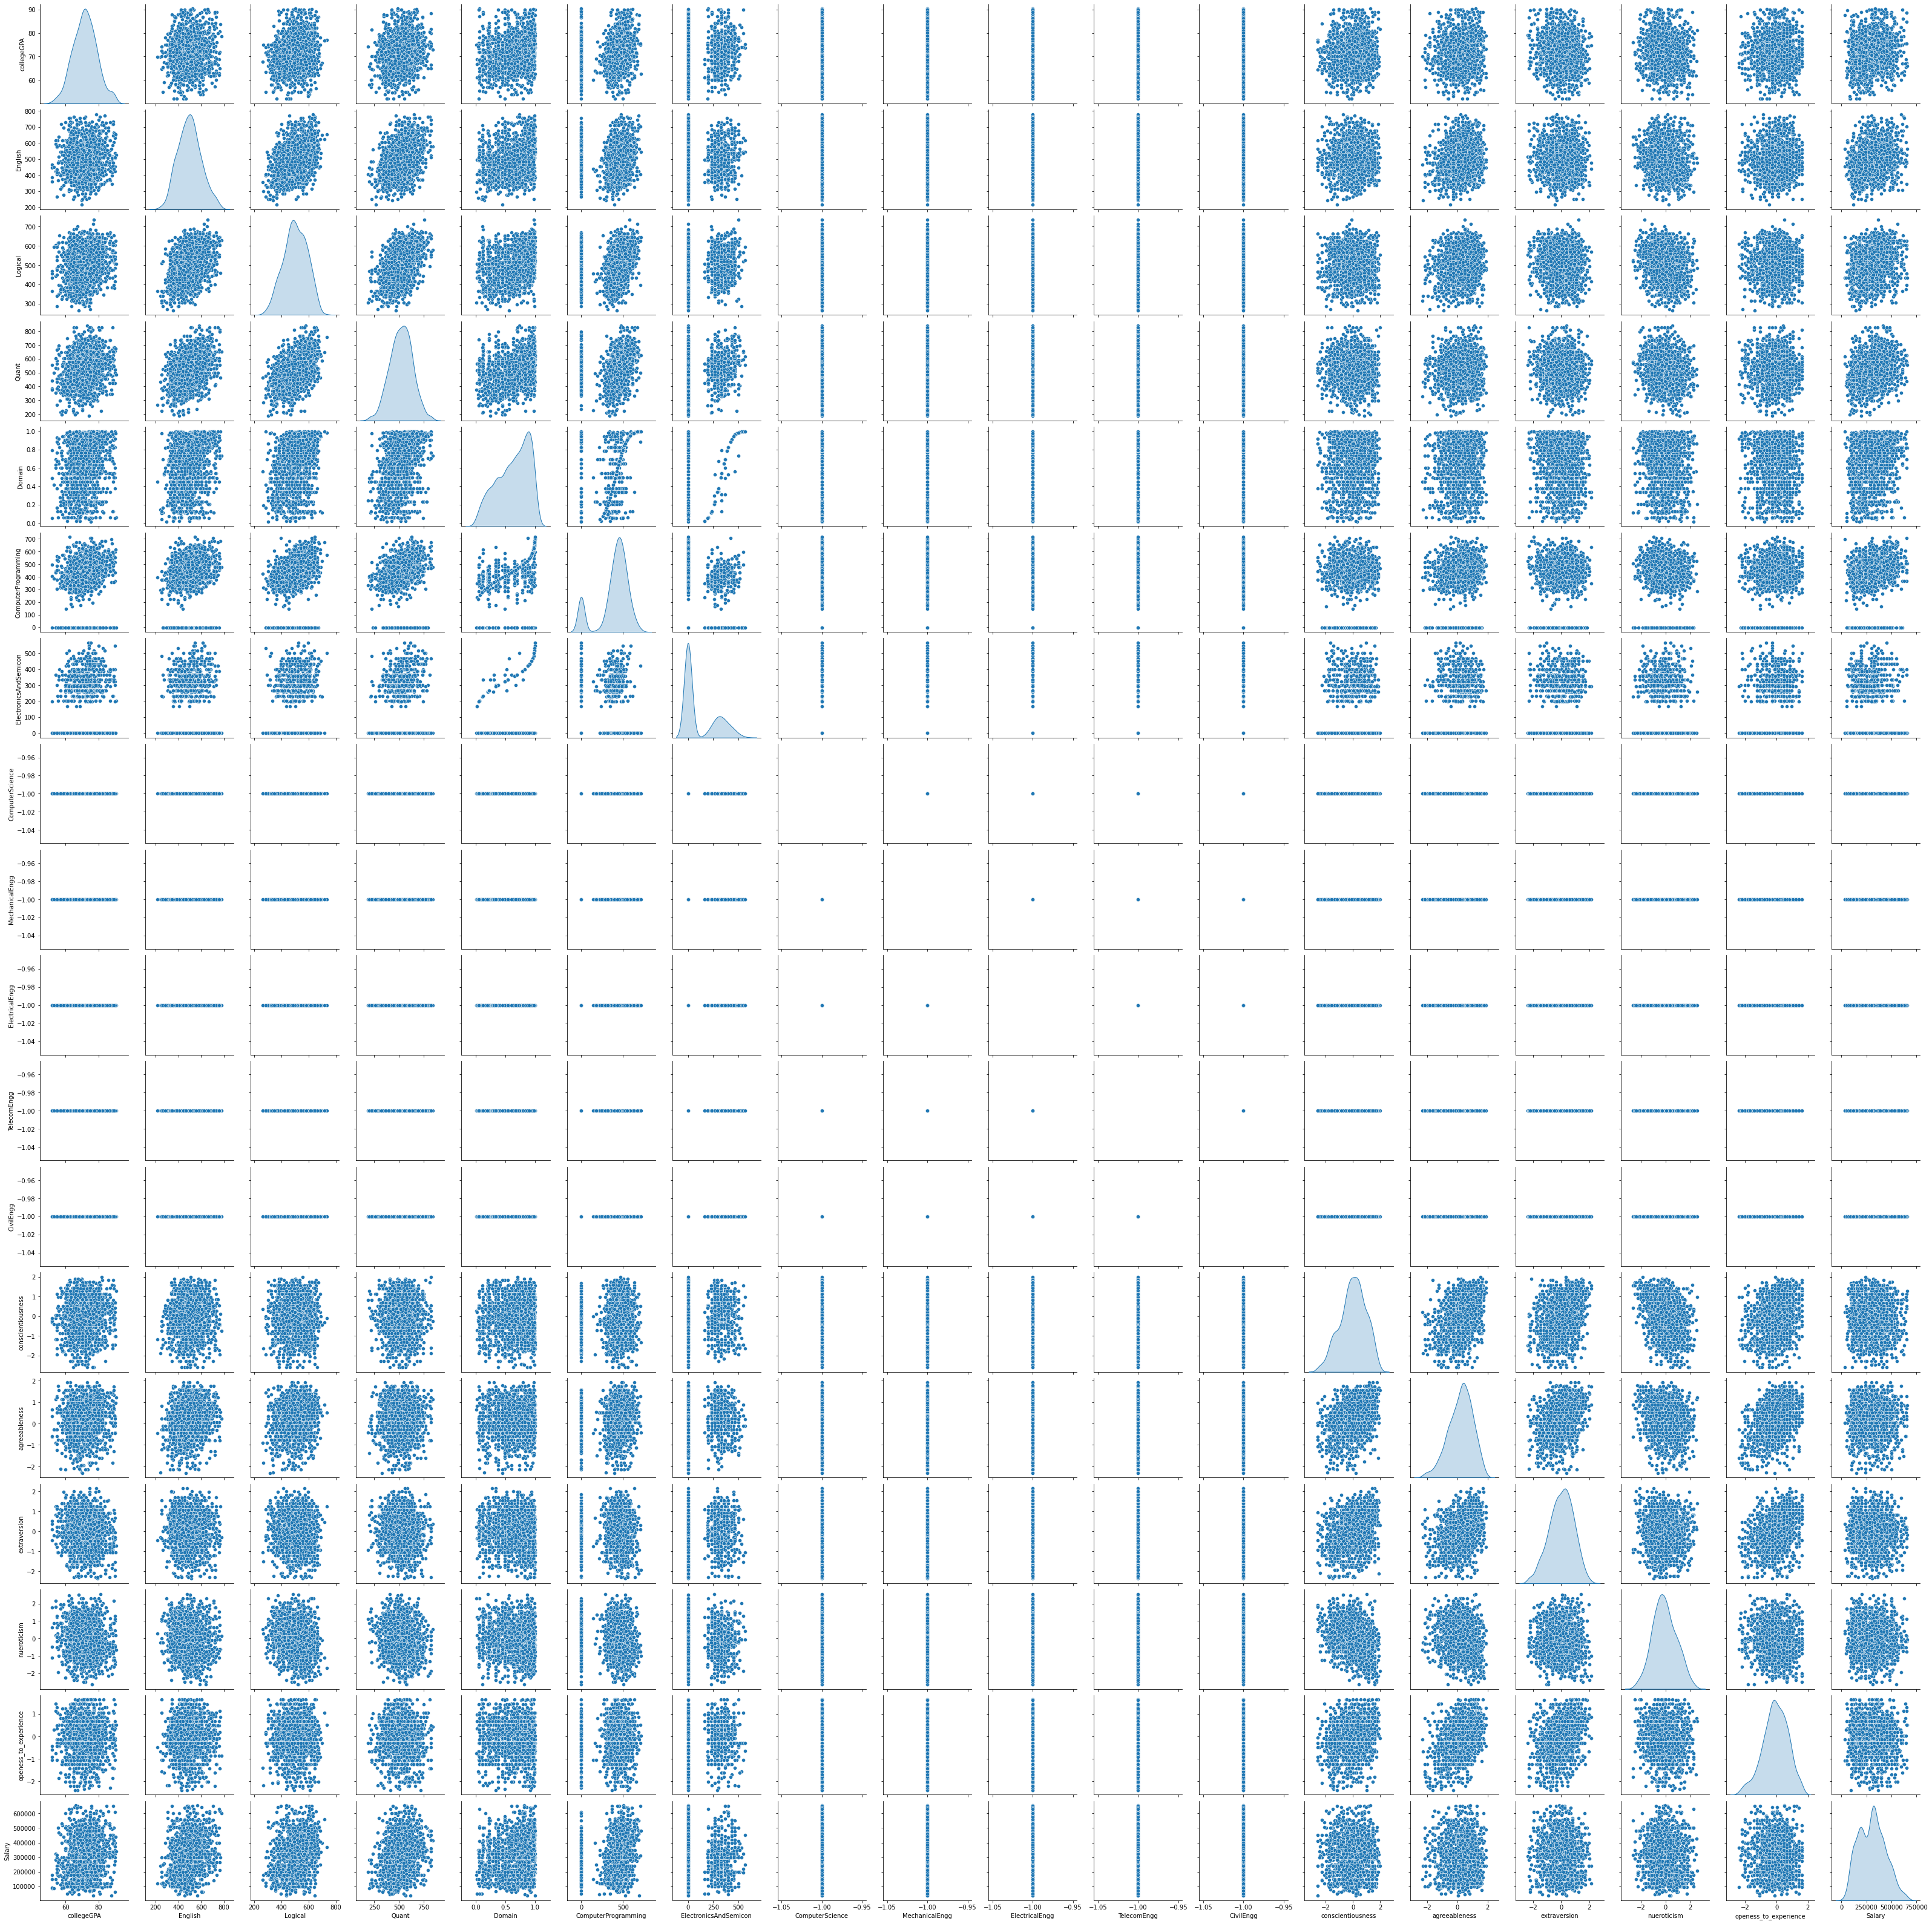

In [ ]:
sns.pairplot(df, diag_kind='kde')

### Melakukan pengamatan terhadap tingkat korelasi dengan menggunakan matrik korelasi pada tiap fitur

Text(0.5, 1.0, 'Matrik Korelasi fitur numerik')

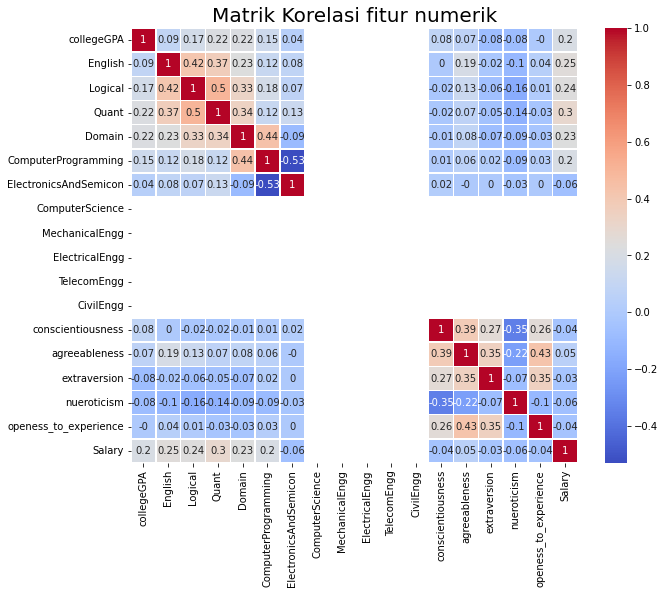

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Matrik Korelasi fitur numerik", size=20)

### Menghapus fitur yang nilai tingkat korelasinya lemah 

<ul type="none">
  <li>Semakin dekat nilainya ke 0, korelasinya semakin lemah</li>
</ul>

In [ ]:
df.drop(['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'CivilEngg', 'TelecomEngg'], inplace=True, axis=1)

### Menampilkan dataset "df" setelah proses drop

In [ ]:
df

Gender  ...  Salary
0         f  ...  445000
1         m  ...  110000
3         m  ...  420000
4         f  ...  200000
7         f  ...  105000
...     ...  ...     ...
2992      m  ...  400000
2993      f  ...  120000
2994      f  ...  120000
2995      m  ...  385000
2996      m  ...  530000

[1433 rows x 16 columns]

### Menampilkan kembali matrik korelasi fitur numerik

Text(0.5, 1.0, 'Matrik Korelasi fitur numerik')

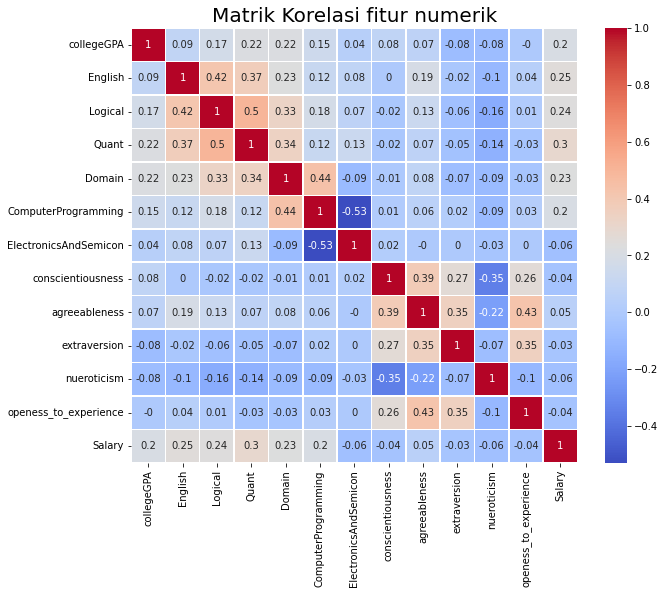

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Matrik Korelasi fitur numerik", size=20)

## DATA PREPARATION

### Encoding Fitur Kategorik ###

In [ ]:
df = pd.concat(
    [df, pd.get_dummies(df['Gender'], 
    prefix='Gender',
    drop_first=True)], 
    axis=1
)

df = pd.concat(
    [df, pd.get_dummies(df['Specialization'], 
    prefix='Specialization',
    drop_first=True)], 
    axis=1
)

df = pd.concat([df, pd.get_dummies(
    df['CollegeState'], 
    prefix='CollegeState',
    drop_first=True)], 
    axis=1
)

df.drop(['Gender', 'Specialization', 'CollegeState'], axis=1, inplace=True)

### Menampilkan dataset ***df*** setelah proses ***Encoding***

In [ ]:
df

collegeGPA  English  ...  CollegeState_Uttarakhand  CollegeState_West Bengal
0          73.82      650  ...                         0                         0
1          65.00      440  ...                         0                         0
3          80.40      675  ...                         0                         0
4          64.30      575  ...                         0                         0
7          71.00      370  ...                         0                         0
...          ...      ...  ...                       ...                       ...
2992       85.00      555  ...                         0                         0
2993       70.00      505  ...                         0                         0
2994       75.20      345  ...                         0                         0
2995       73.19      385  ...                         0                         0
2996       74.81      465  ...                         0                         0

[1433 rows x 58 columns]

### Membuat plot berpasangan pada fitur numerik

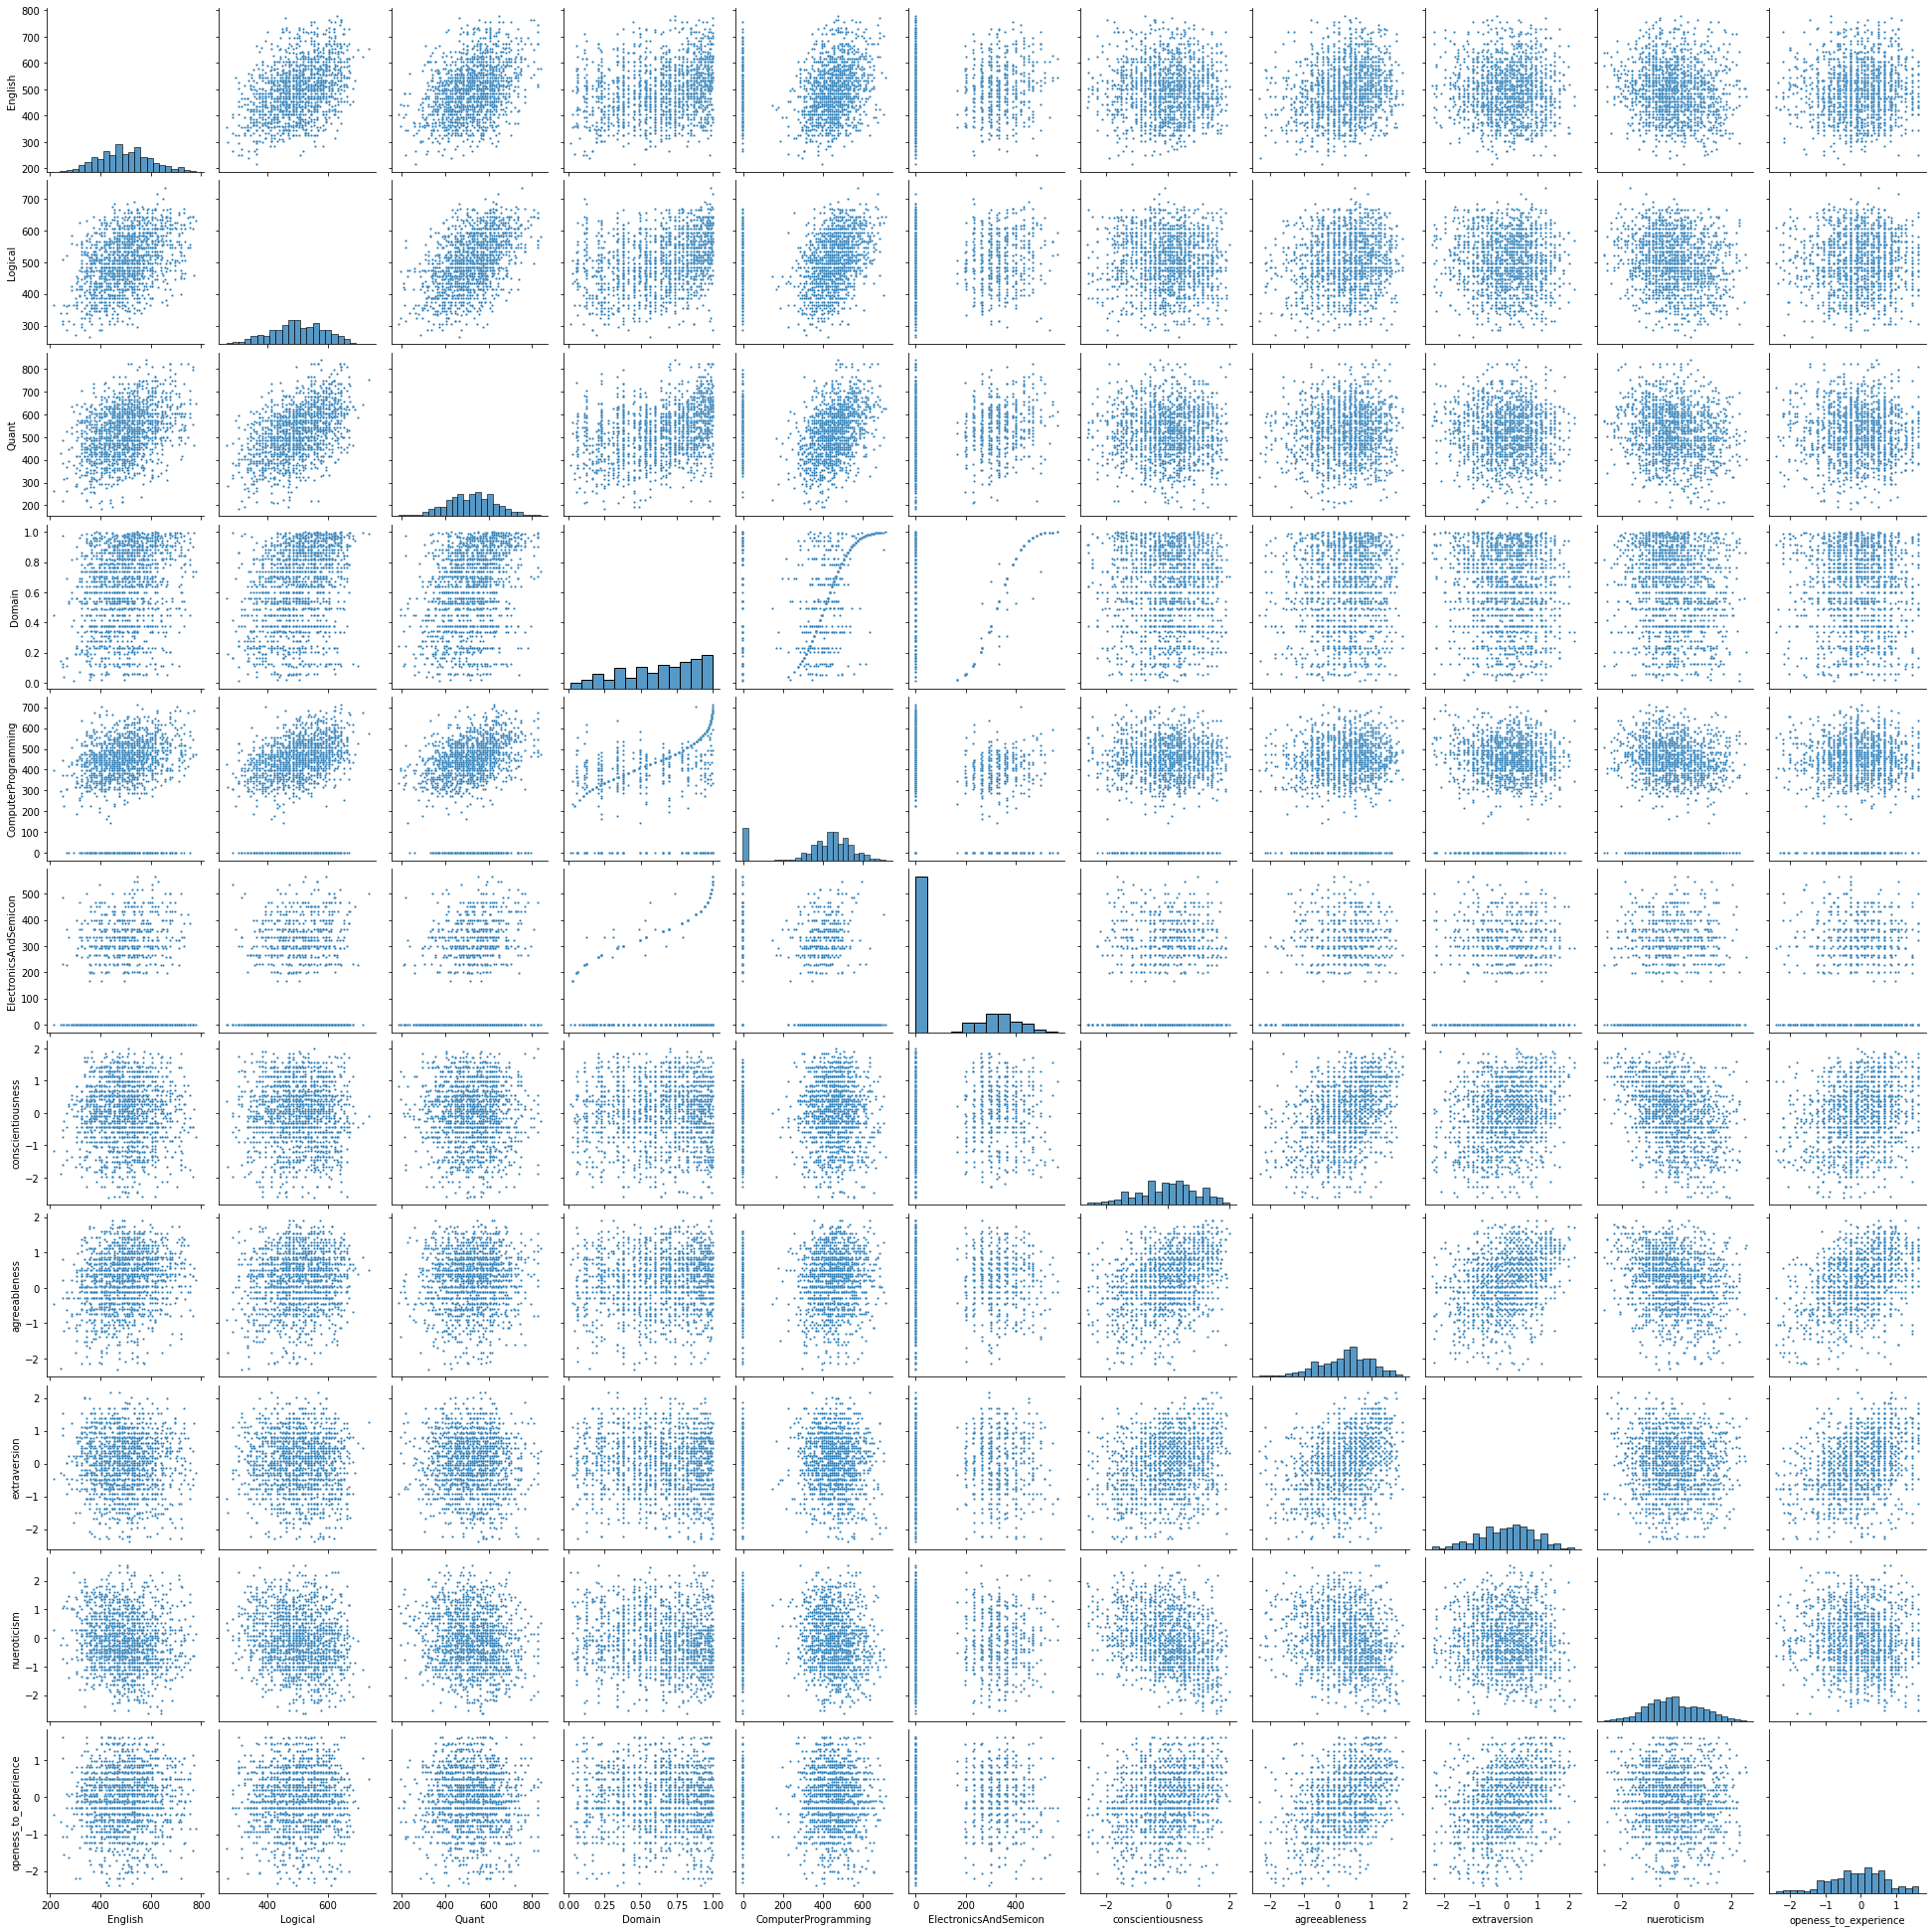

In [ ]:
sns.pairplot(
    df[['English',	'Logical',	'Quant',	'Domain',	'ComputerProgramming',
        'ElectronicsAndSemicon',	'conscientiousness',	'agreeableness',
        'extraversion',	'nueroticism',	'openess_to_experience']], 
    plot_kws = {"s":5}
)

### Menerapkan PCA pada fitur numerik

In [ ]:
pca = PCA(n_components=11, random_state=123)
pca.fit(
    df[['English',	'Logical',	'Quant',	'Domain',	'ComputerProgramming',
        'ElectronicsAndSemicon',	'conscientiousness',	'agreeableness',
        'extraversion',	'nueroticism',	'openess_to_experience']])

PCA(n_components=11, random_state=123)

### Melihat informasi proporsi ratio PC pada 11 fitur numerik

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.51, 0.24, 0.12, 0.08, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

### Mereduksi dimensi dengan menggunakan fitur baru

In [ ]:
pca = PCA(n_components=1, random_state=123)

pca.fit(
    df[['English',	'Logical',	'Quant',	'Domain',	'ComputerProgramming',
        'ElectronicsAndSemicon',	'conscientiousness',	'agreeableness',
        'extraversion',	'nueroticism',	'openess_to_experience']]
)

df['AMCATscore'] = pca.transform(
    df.loc[:, ('English',	'Logical',	'Quant',	'Domain',	'ComputerProgramming',
              'ElectronicsAndSemicon',	'conscientiousness',	'agreeableness',
              'extraversion',	'nueroticism',	'openess_to_experience')]
).flatten()

df.drop(
    ['English',	'Logical',	'Quant',	'Domain',	'ComputerProgramming',
      'ElectronicsAndSemicon',	'conscientiousness',	'agreeableness',
      'extraversion',	'nueroticism',	'openess_to_experience'],
      axis=1, inplace=True
) 

### Menampilkan dataset ***df*** setelah proses reduksi dimensi

In [ ]:
df

collegeGPA  Salary  ...  CollegeState_West Bengal  AMCATscore
0          73.82  445000  ...                         0   83.970465
1          65.00  110000  ...                         0  -47.335523
3          80.40  420000  ...                         0 -282.799767
4          64.30  200000  ...                         0  -17.591881
7          71.00  105000  ...                         0 -122.567317
...          ...     ...  ...                       ...         ...
2992       85.00  400000  ...                         0 -196.168578
2993       70.00  120000  ...                         0  256.942006
2994       75.20  120000  ...                         0  -15.491776
2995       73.19  385000  ...                         0 -101.113495
2996       74.81  530000  ...                         0 -194.448813

[1433 rows x 48 columns]

### Membagi dataset menjadi train dan test

In [ ]:
X = df.drop(["Salary"], axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=123)

print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 1433
Total of sample in train dataset: 1146
Total of sample in test dataset: 287


### Menerapkan teknik Standarisasi 

<ul type="none" align="justify">
  <li>Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses standarisasi dapat membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. </li>
</ul>

In [ ]:
numeric_feature = ['collegeGPA', 'AMCATscore']
scaler = StandardScaler()
scaler.fit(X_train[numeric_feature])
X_train[numeric_feature] = scaler.transform(X_train.loc[:, numeric_feature])
X_train[numeric_feature]

collegeGPA  AMCATscore
2464   -1.876509   -0.089239
1864   -0.320838   -0.619915
2187   -1.644843   -0.556055
1834    0.434533   -0.794658
2233    0.180403   -0.482240
...          ...         ...
2366    1.710801   -0.575242
2302   -0.942826    0.880080
937    -0.959674   -0.624437
1493   -0.619898   -0.475811
2525   -0.942826   -0.480521

[1146 rows x 2 columns]

### Menampilkan data numerik x_train setalah proses ***Standarisasi***

In [ ]:
X_train[numeric_feature].describe().round(4)

collegeGPA  AMCATscore
count   1146.0000   1146.0000
mean       0.0000     -0.0000
std        1.0004      1.0004
min       -2.7681     -1.5282
25%       -0.6620     -0.7228
50%        0.0042     -0.3985
75%        0.6437      0.6246
max        2.6010      2.5637

## MODEL DEVELOPMENT

### Menyiapkan dataframe untuk analisa model

In [ ]:
models = pd.DataFrame(
    index=['train_mse', 'test_mse'],
    columns=['KNN', 'RandomForest', 'Boosting']
)

### Menerapkan teknik Standarisasi

<ul type="none" align="justify">
  <li>
  Terdapat beberapa algoritma yang dapat diterapkan pada kasus regresi. Mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik adalah cara yang dapat kita lakukan sebagai solusi utama. Ketiga algoritma yang digunakan, antara lain:
  <ol type="1">
    <li>K-Nearest Neighbor (KNN)</li>
    <li>Random Forest</li>
    <li>Boosting Algorithm:
      <ul>
        <li>Adaptive Boosting</li>
      </ul>
    </li>
  
  </ol>
  
  </li>
</ul>

#### Model prediksi dengan algoritma KNN

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=100)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_train)

#### Model prediksi dengan algoritma Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=100, max_depth=1, random_state=123, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

#### Model prediksi dengan algoritma Boosting Algorithm : Adaptive Boosting

In [ ]:
boosting = AdaBoostRegressor(n_estimators=100, learning_rate=0.05, random_state=256)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train),
                                                         y_true=y_train)

## EVALUASI MODEL

<ul type="none" align="justify">
  <li>
  Secara umum, jika nilai prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. Secara teknis, selisih antara nilai sebenarnya dan nilai prediksi disebut eror. Maka, semua metrik mengukur seberapa kecil nilai eror tersebut.  
  </li>
</ul>

### Melakukan Proses ***Scaling*** terhadap data uji

<ul type="none" align="justify">
  <li>
    Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.
  </li>
</ul>

In [ ]:
X_test.loc[:, numeric_feature] = scaler.transform(X_test[numeric_feature])

### Mengevaluasi ketiga model prediksi dengan metrik MSE

<ul type="none" align="justify">
  <li>
Metrik yang gunakan pada prediksi ini adalah MSE(Mean Squared Error) yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.
  </li>
</ul>

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])
model_dict = {'KNN': KNN, 'RF': RF, 'Boosting':boosting}

for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e6
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e6

# Data metrik MSE 
mse

train     test
KNN       15410.9  15469.4
RF        15832.1  16518.6
Boosting  14644.2    15723

### Membuat Plot metrik MSE dengan bar chart

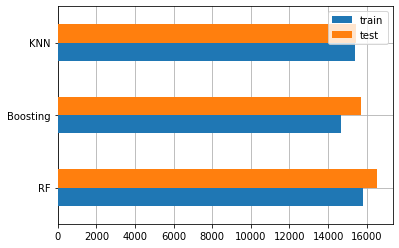

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Pengujian model prediksi menggunakan nilai ***Salary*** dari dataset

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'Salary':y_test[:1]}

for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

Salary  prediksi_KNN  prediksi_RF  prediksi_Boosting
2433  315000      308050.0     280280.9           293776.4

## KESIMPULAN
<ul type="none" align="justify">
  <li>
Pengujian setiap model dengan algoritma yang berbeda menghasilkan nilai prediksi yang berbeda pula. Model dengan nilai yang mendekati nilai sebenarnya diperoleh pada prediksi dengan menggunakan algoritma K-Nearest Neighbor. Untuk 
prediksi menggunakan algoritma Random Forest dan Boosting, performanya masih dibawah prediksi model KNN. Sehingga dapat disimpulkan bahwa pada kasus ini, model dengan menggunakan Algoritma KNN lebih tepat untuk digunakan atau diterapkan.
  </li>
</ul>